<a href="https://colab.research.google.com/github/DaffaFathir/Machine-Learning-Task/blob/main/Tugas%2011/LeNet_Daffa%20Fathir%20Fajri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Nama    : Daffa Fathir Fajri
# NIM     : 1103213149
# Kelas   : TK-45-04
# Lecture : 10
# Model   : CNN
# Dataset : CIFAR10

chatGPT :

1. Import Libraries

In [30]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2. Load and Preprocess Data
Kami akan menggunakan dataset MNIST untuk demonstrasi, yang terdiri dari gambar tulisan tangan digit.

In [31]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocess data
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


11490434/11490434 [==============================] - 0s 0us/step


3. Define the LeNet Model
Berikut adalah arsitektur model LeNet:

In [32]:
def create_lenet():
    model = models.Sequential()

    # Layer 1: Convolutional Layer + Activation + Pooling
    model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)))
    model.add(layers.AveragePooling2D())

    # Layer 2: Convolutional Layer + Activation + Pooling
    model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'))
    model.add(layers.AveragePooling2D())

    # Flatten the feature maps
    model.add(layers.Flatten())

    # Layer 3: Fully Connected Layer + Activation
    model.add(layers.Dense(120, activation='tanh'))

    # Layer 4: Fully Connected Layer + Activation
    model.add(layers.Dense(84, activation='tanh'))

    # Output Layer: Fully Connected Layer with Softmax Activation
    model.add(layers.Dense(10, activation='softmax'))

    return model

lenet = create_lenet()
lenet.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 120)              

4. Compile the Model

In [33]:
lenet.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


5. Train the Model

In [34]:
history = lenet.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 39s 19ms/step - loss: 0.2510 - accuracy: 0.9249 - val_loss: 0.1129 - val_accuracy: 0.9663
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0961 - accuracy: 0.9707 - val_loss: 0.0710 - val_accuracy: 0.9772
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0647 - accuracy: 0.9802 - val_loss: 0.0570 - val_accuracy: 0.9824
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0496 - accuracy: 0.9844 - val_loss: 0.0532 - val_accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0404 - accuracy: 0.9869 - val_loss: 0.0533 - val_accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.0506 - val_accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0262 - accuracy: 0.9913 - val_loss: 0.0480 -

6. Evaluate the Model

In [35]:
test_loss, test_acc = lenet.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 2s - loss: 0.0477 - accuracy: 0.9849 - 2s/epoch - 6ms/step

Test accuracy: 0.9848999977111816


7. Plot Training History
Untuk visualisasi proses pelatihan:

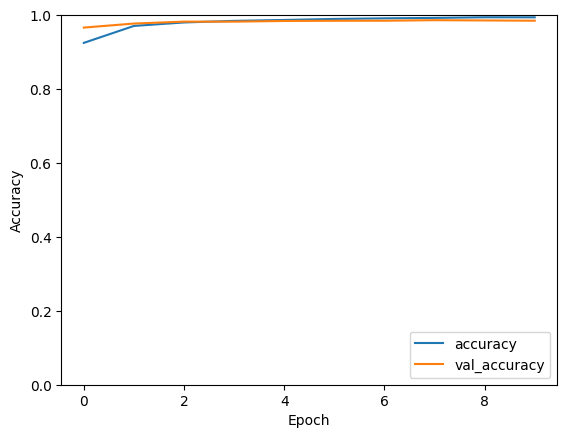

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
